### Connecting With Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [2]:
import torch
import torch.nn as nn
import os
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from pathlib import Path
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from sklearn.model_selection import train_test_split
import torchvision

### Checking for GPU

In [3]:
device  = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Accessing Directory and Displaying Photos

In [4]:
data_path = Path("/content/drive/MyDrive/")
image_path = data_path / "Pothole_hac"

In [5]:
import os
def walk_through_dir(dirpath):
  for dirpath, dirnames, filenames in os.walk(dirpath):
    print("There are {} directories and {} images in '{}'".format(len(dirnames), len(filenames), dirpath))

In [6]:
train_dir = image_path / "train"
test_dir = image_path / "test"

Random image path: /content/drive/MyDrive/Pothole_hac
Image class: potholes
Image height: 720
Image width: 1280


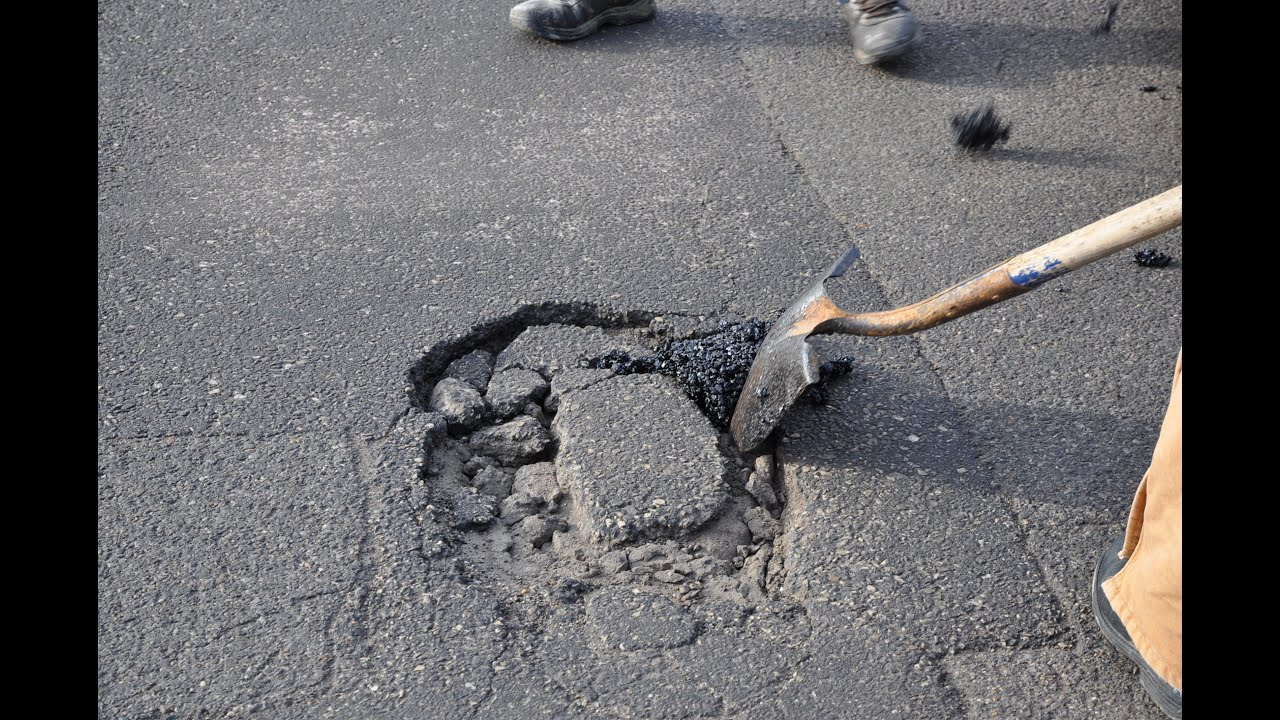

In [7]:
# Get all images
image_path_list = list(image_path.glob("*/*/*.jpg"))

# pick a random image
random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

# Open image
img = Image.open(random_image_path)

print("Random image path: {}".format(image_path))
print("Image class: {}".format(image_class))
print("Image height: {}".format(img.height))
print("Image width: {}".format(img.width))
img

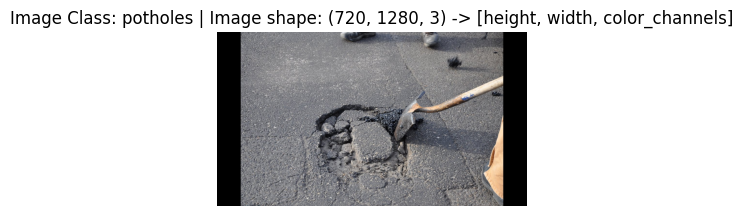

In [8]:
img_as_array = np.asarray(img)

plt.figure(figsize=(4,4))
plt.imshow(img_as_array)
plt.title("Image Class: {} | Image shape: {} -> [height, width, color_channels]".format(image_class, img_as_array.shape))
plt.axis(False);

### Transformation

In [9]:
data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

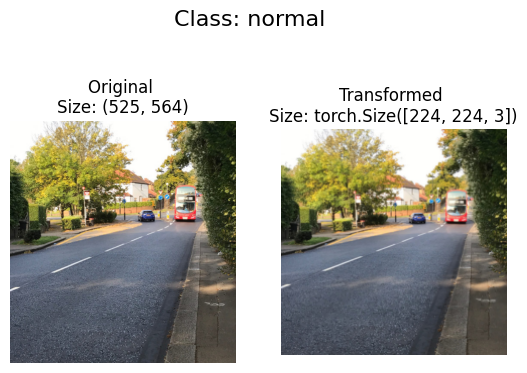

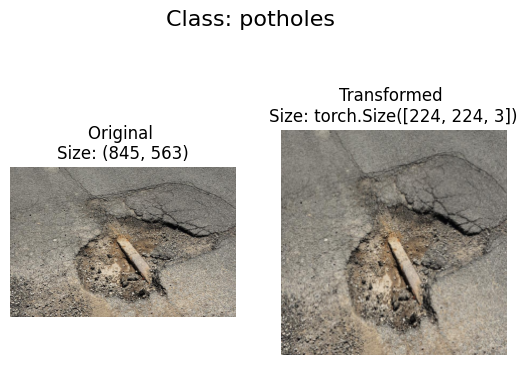

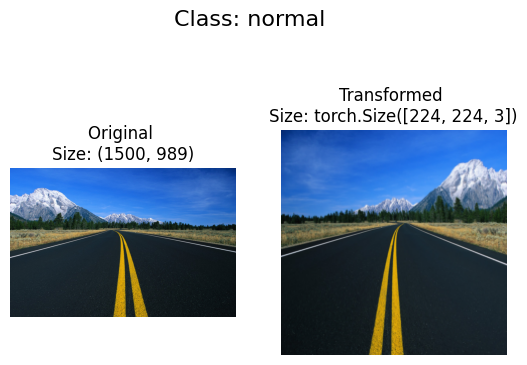

In [10]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

### Loading Images and Initializing DataLoader

In [11]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 544
    Root location: /content/drive/MyDrive/Pothole_hac/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 137
    Root location: /content/drive/MyDrive/Pothole_hac/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [12]:
class_names = train_data.classes
class_dict = train_data.class_to_idx
class_names, class_dict, len(train_data), len(test_data)

(['normal', 'potholes'], {'normal': 0, 'potholes': 1}, 544, 137)

In [13]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.8745, 0.8078, 0.8196,  ..., 0.8745, 0.8549, 0.9098],
         [0.8000, 0.6706, 0.6549,  ..., 0.7490, 0.7569, 0.8549],
         [0.7333, 0.5255, 0.4745,  ..., 0.6196, 0.6510, 0.8078],
         ...,
         [0.7843, 0.6118, 0.5922,  ..., 0.5490, 0.5961, 0.8235],
         [0.8667, 0.7490, 0.7451,  ..., 0.7373, 0.7412, 0.8902],
         [0.9569, 0.8784, 0.8941,  ..., 0.9137, 0.8784, 0.9647]],

        [[0.9373, 0.8863, 0.9294,  ..., 0.9412, 0.9020, 0.9451],
         [0.8706, 0.7608, 0.7725,  ..., 0.8157, 0.8039, 0.8902],
         [0.8196, 0.6314, 0.6118,  ..., 0.6863, 0.6980, 0.8431],
         ...,
         [0.7961, 0.6235, 0.6078,  ..., 0.5294, 0.5765, 0.8039],
         [0.8784, 0.7608, 0.7608,  ..., 0.7176, 0.7216, 0.8784],
         [0.9686, 0.8902, 0.9098,  ..., 0.8941, 0.8588, 0.9569]],

        [[0.9843, 0.9647, 1.0000,  ..., 0.9490, 0.9059, 0.9451],
         [0.9294, 0.8392, 0.8549,  ..., 0.8235, 0.8078, 0.8902],
         [0.8824, 0.7020, 0.6980,  ..., 0.69

Original shape: torch.Size([3, 224, 224]) -> [color_channels, height, width]
Image permute shape: torch.Size([224, 224, 3]) -> [height, width, color_channels]


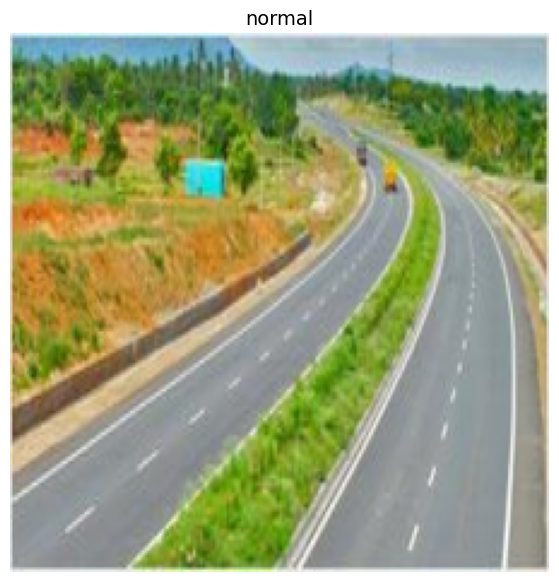

In [14]:
img_permute = img.permute(1, 2, 0)

print("Original shape: {} -> [color_channels, height, width]".format(img.shape))
print("Image permute shape: {} -> [height, width, color_channels]".format(img_permute.shape))

plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [15]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b7cd013fcd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b7cd01cfac0>)

In [16]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 224, 224]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


### Model

In [17]:
class TinyVGG(nn.Module):

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*56*56,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [18]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=64,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=200704, out_features=2, bias=True)
  )
)

In [19]:
img_batch , label_batch = next(iter(train_dataloader))
img_batch.shape, label_batch.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

### Training Step

In [20]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

### Testing Step

In [21]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

### Training Loop

In [22]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [23]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7584 | train_acc: 0.4982 | test_loss: 0.6892 | test_acc: 0.5563
Epoch: 2 | train_loss: 0.6965 | train_acc: 0.5129 | test_loss: 0.6548 | test_acc: 0.7375
Epoch: 3 | train_loss: 0.6143 | train_acc: 0.6673 | test_loss: 0.5535 | test_acc: 0.7688
Epoch: 4 | train_loss: 0.5256 | train_acc: 0.7261 | test_loss: 0.4963 | test_acc: 0.7688
Epoch: 5 | train_loss: 0.4530 | train_acc: 0.7702 | test_loss: 0.5583 | test_acc: 0.7118
Epoch: 6 | train_loss: 0.3493 | train_acc: 0.8401 | test_loss: 0.3144 | test_acc: 0.8750
Epoch: 7 | train_loss: 0.3158 | train_acc: 0.8713 | test_loss: 0.3539 | test_acc: 0.8688
Epoch: 8 | train_loss: 0.2701 | train_acc: 0.8842 | test_loss: 0.3722 | test_acc: 0.8438
Epoch: 9 | train_loss: 0.2654 | train_acc: 0.8897 | test_loss: 0.3371 | test_acc: 0.8750
Epoch: 10 | train_loss: 0.2542 | train_acc: 0.8879 | test_loss: 0.3331 | test_acc: 0.8688
Epoch: 11 | train_loss: 0.2837 | train_acc: 0.8658 | test_loss: 0.3757 | test_acc: 0.8438
Epoch: 12 | train_l

### Saving Model

In [24]:
model_path = '/content/drive/MyDrive/Pothole_hac/final_model.pth'
torch.save(model_0.state_dict(), model_path)

### Custom Image Classification

In [25]:
custom_img_path = image_path / "custom_image/custom_normal1.jpeg"

### Custom Image Transformation

In [26]:
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(224,224))
])

### Prediction and Plotting Custom Image

In [27]:
def pred_and_plot(model: torch.nn.Module,
                  image_path: str,
                  class_names = None,
                  transform = None,
                  device = device):
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  target_image = target_image/255

  if transform:
    target_image = transform(target_image)

  model.to(device)

  with torch.inference_mode():
    target_image = target_image.unsqueeze(0)

    target_image_pred = model(target_image.to(device))

  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  plt.imshow(target_image.squeeze().permute(1,2,0))

  if class_names:
      title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
      title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False);

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


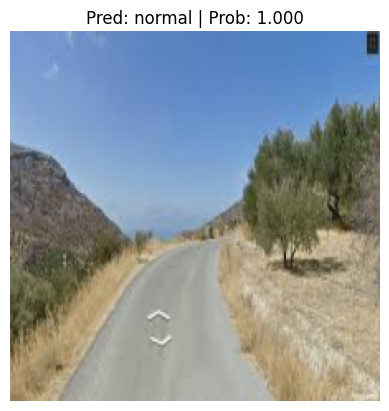

In [28]:
# Predict Custom Data
pred_and_plot(model=model_0,
              image_path = custom_img_path,
              class_names= class_names,
              transform = custom_image_transform,
              device=device
              )